### KMeansClustering - Image Compression

In [1]:
#Required Imports
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

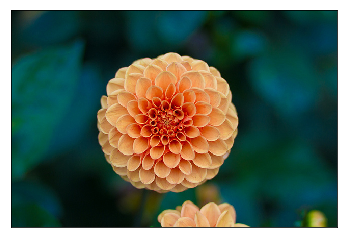

In [38]:
#Loading The Sample Image
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [39]:
#Shape Of The Image
flower.shape

(427, 640, 3)

In [40]:
#The Above Output Means That There Are 427 Rows In The Input Data With 640 Values Each Of Array Size 3.
print(flower[0][0])

[ 2 19 13]


In [41]:
#Lets Divide The Entire Array By 255, To Convert The Values To Lie B/W 0 And 1.
flower_data = flower/255
flower_data[0]

array([[ 0.00784314,  0.0745098 ,  0.05098039],
       [ 0.01176471,  0.07058824,  0.05098039],
       [ 0.02745098,  0.07843137,  0.05098039],
       ..., 
       [ 0.00392157,  0.30196078,  0.25098039],
       [ 0.        ,  0.29803922,  0.25098039],
       [ 0.        ,  0.29411765,  0.24705882]])

In [42]:
#Lets Reshape The Data So That They Can Be Represented As Points
flower_data = flower_data.reshape(427*640, 3)
flower_data

array([[ 0.00784314,  0.0745098 ,  0.05098039],
       [ 0.01176471,  0.07058824,  0.05098039],
       [ 0.02745098,  0.07843137,  0.05098039],
       ..., 
       [ 0.02745098,  0.18039216,  0.10980392],
       [ 0.03137255,  0.17647059,  0.10980392],
       [ 0.03529412,  0.16862745,  0.10588235]])

In [43]:
#Shape Of The New Dataset
flower_data.shape

(273280, 3)

In [44]:
#Lets Write A Function To Plot Pixles
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:10000]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, s=10)
    ax[0].set(xlabel='Red', ylabel='Green')

    ax[1].scatter(R, B, color=colors, s=10)
    ax[1].set(xlabel='Red', ylabel='Blue')
    
    fig.suptitle(title, size=20)

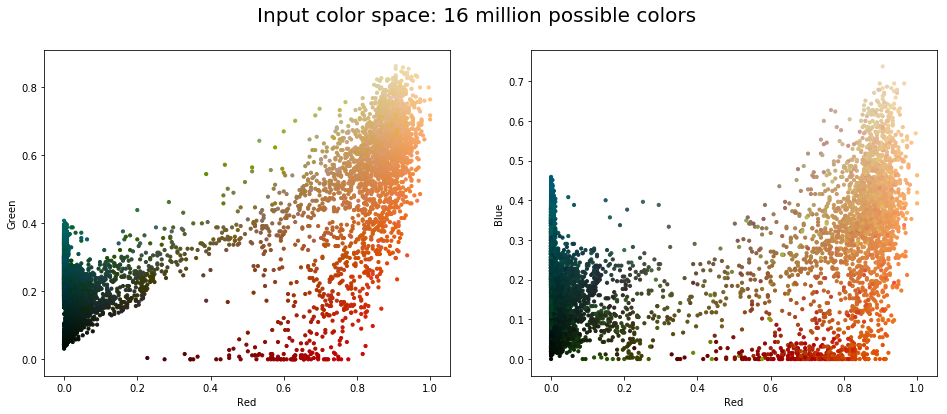

In [45]:
plot_pixels(flower_data, title = "Input color space: 16 million possible colors")

In [46]:
#Lets Create 16 Clusters From All The Data Points
from sklearn.cluster import MiniBatchKMeans
Kmeans = MiniBatchKMeans(16)
pred = Kmeans.fit_predict(flower_data)
print(pred)

[ 0  0  0 ..., 11 11 11]


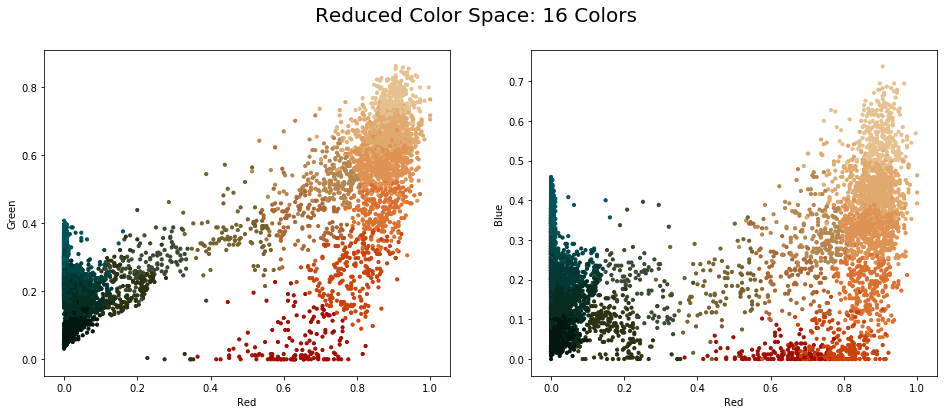

In [47]:
new_colors = Kmeans.cluster_centers_[pred]
plot_pixels(flower_data, colors=new_colors, title="Reduced Color Space: 16 Colors")

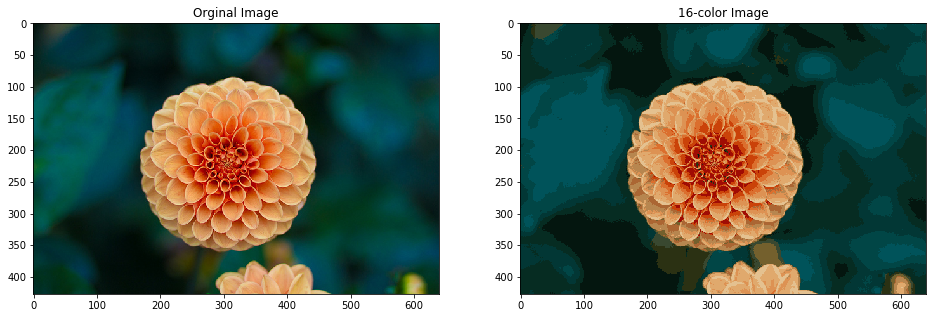

In [48]:
flower_recolored = new_colors.reshape(flower.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), )
ax[0].imshow(flower)
ax[0].set_title('Orginal Image')
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image')

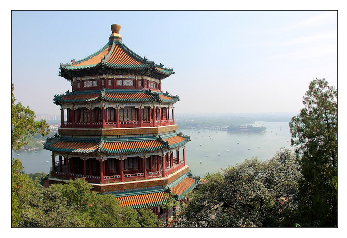

In [55]:
#Lets Apply The Same Alg To Another HD Image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [56]:
china.shape

(427, 640, 3)

In [57]:
#Lets Divide The Entire Array By 255 And Reshape It.
china_data = china/255
china_data = china_data.reshape(427*640,3)
china_data

array([[ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       ..., 
       [ 0.16862745,  0.19215686,  0.15294118],
       [ 0.05098039,  0.08235294,  0.02352941],
       [ 0.05882353,  0.09411765,  0.02745098]])

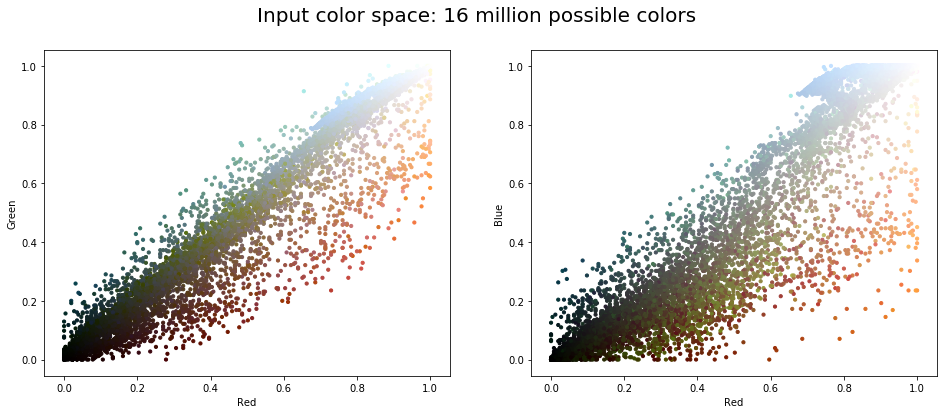

In [58]:
plot_pixels(china_data, title = "Input color space: 16 million possible colors")

In [63]:
Kmeans = MiniBatchKMeans(8)
pred = Kmeans.fit_predict(china_data)
print(pred)

[5 5 5 ..., 1 4 4]


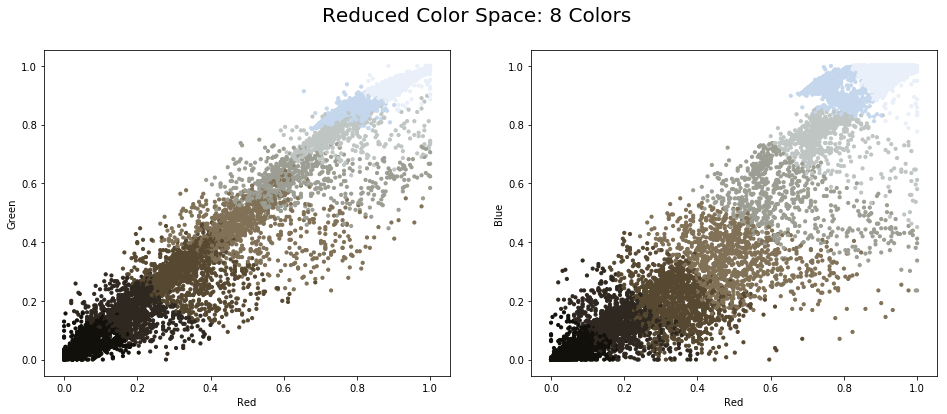

In [66]:
new_colors = Kmeans.cluster_centers_[pred]
plot_pixels(china_data, colors=new_colors, title="Reduced Color Space: 8 Colors")

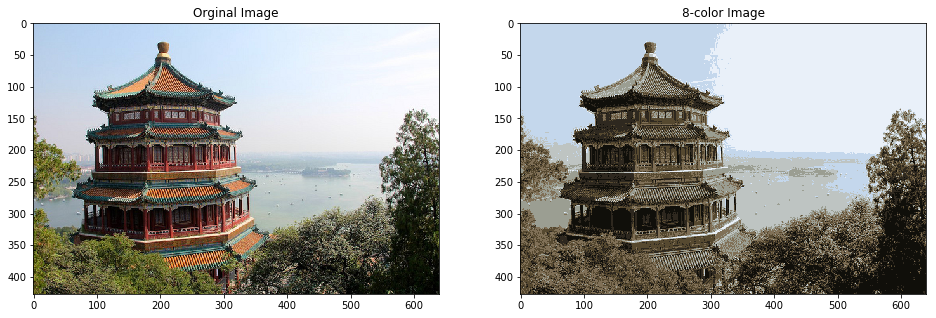

In [67]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), )
ax[0].imshow(china)
ax[0].set_title('Orginal Image')
ax[1].imshow(china_recolored)
ax[1].set_title('8-color Image')